# No50

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip -y NewsAggregatorDataset.zip

# 行数の確認
!wc -l ./newsCorpora.csv

# !head -10 ./newsCorpora.csv

!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

--2020-06-23 15:12:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip.4’

NewsAggregatorDatas 100%[===================>]  27.87M   242KB/s    in 2m 59s  

2020-06-23 15:15:53 (160 KB/s) - ‘NewsAggregatorDataset.zip.4’ saved [29224203/29224203]

/usr/bin/sh: 1: unzip: not found
422937 ./newsCorpora.csv


In [2]:
import pandas as pd

df = pd.read_csv('newsCorpora_re.csv', header=None, sep='\t', names=['ID','TITLE', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESRAMP'])

df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])]

from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

train.to_csv('./train.csv', sep='\t', index=False)
valid.to_csv('./valid.csv', sep='\t', index=False)
test.to_csv('./test.csv', sep='\t', index=False)

print(f"学習データ: \n{train['CATEGORY'].value_counts()}")
print(f"学習データ: \n{valid['CATEGORY'].value_counts()}")
print(f"学習データ: \n{test['CATEGORY'].value_counts()}")

学習データ: 
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
学習データ: 
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
学習データ: 
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


# No51

In [3]:
import string
import re

def preprocessing(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(table)
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    
    return text

df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)

df['TITLE'] = df['TITLE'].map(lambda x: preprocessing(x))

print(df.head())

                                                  ID  \
0  REFILE-UPDATE 1-European car sales up for sixt...   
1  Amazon Plans to Fight FTC Over Mobile-App Purc...   
2  Kids Still Get Codeine In Emergency Rooms Desp...   
3  What On Earth Happened Between Solange And Jay...   
4  NATO Missile Defense Is Flight Tested Over Hawaii   

                                               TITLE         PUBLISHER  \
0  http   in reuters com article 0 0 0 acea carsa...           Reuters   
1  http   www businessweek com news 0 0 0 amazon ...      Businessweek   
2  http   www huffingtonpost com 0 0 0 kids still...   Huffington Post   
3  http   www contactmusic com article solange ja...  Contactmusic.com   
4  http   www huffingtonpost com 0 0 0 missile te...   Huffington Post   

  CATEGORY                          STORY                HOSTNAME  \
0        b  dP4BcEYmhTFmm6MsVBiGs6LMjkveM          in.reuters.com   
1        t  dC11KnAGOaFsolMro8nmloLpo11EM    www.businessweek.com   
2        m 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# データ分割
train_valid = df[:len(train) + len(valid)]
test = df[len(train) + len(valid):]

vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))

# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid['TITLE'])
X_test = vec_tfidf.transform(test['TITLE'])

# ベクトルをデータフレームに変換
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names())

# データ分割
X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

# データ保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)

print(X_train.head())

    0k   0m  0million   0s  0th  0th birthday  aaliyah  aap  aap article  \
0  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
1  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
2  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
3  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
4  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   

   abbvie  ...  york  york city  you  young  your  your mother  yuan  zac  \
0     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
1     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
2     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
3     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
4     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   

   zac efron  zendaya  
0        0.0      0.0  
1        0.0      0.0  
2       

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# データ分割
train_valid = df[:len(train) + len(valid)]
test = df[len(train) + len(valid):]

vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))

# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid['TITLE'])
X_test = vec_tfidf.transform(test['TITLE'])

# ベクトルをデータフレームに変換
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vec_tfidf.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names())

# データ分割
X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

# データ保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)

print(X_train.head())

    0k   0m  0million   0s  0th  0th birthday  aaliyah  aap  aap article  \
0  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
1  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
2  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
3  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   
4  0.0  0.0       0.0  0.0  0.0           0.0      0.0  0.0          0.0   

   abbvie  ...  york  york city  you  young  your  your mother  yuan  zac  \
0     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
1     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
2     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
3     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   
4     0.0  ...   0.0        0.0  0.0    0.0   0.0          0.0   0.0  0.0   

   zac efron  zendaya  
0        0.0      0.0  
1        0.0      0.0  
2       

In [6]:
train_valid['TITLE']

0        http   in reuters com article 0 0 0 acea carsa...
1        http   www businessweek com news 0 0 0 amazon ...
2        http   www huffingtonpost com 0 0 0 kids still...
3        http   www contactmusic com article solange ja...
4        http   www huffingtonpost com 0 0 0 missile te...
                               ...                        
12015    http   www contactmusic com article avichii ho...
12016    http   www reuters com article 0 0 0 usa netne...
12017    http   www businessweek com news 0 0 0 two afr...
12018    http   www huffingtonpost com terry connelly i...
12019    http   www dailymail co uk tvshowbiz article 0...
Name: TITLE, Length: 12020, dtype: object

In [7]:
train_valid.head()

,ID,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESRAMP
0,REFILE-UPDATE 1-European car sales up for sixt...,http in reuters com article 0 0 0 acea carsa...,Reuters,b,dP4BcEYmhTFmm6MsVBiGs6LMjkveM,in.reuters.com,1395156135844
1,Amazon Plans to Fight FTC Over Mobile-App Purc...,http www businessweek com news 0 0 0 amazon ...,Businessweek,t,dC11KnAGOaFsolMro8nmloLpo11EM,www.businessweek.com,1404388366201
2,Kids Still Get Codeine In Emergency Rooms Desp...,http www huffingtonpost com 0 0 0 kids still...,Huffington Post,m,dQWESAfyLK7SE3MN4Yi2vwIjU1kmM,www.huffingtonpost.com,1398174665891
3,What On Earth Happened Between Solange And Jay...,http www contactmusic com article solange ja...,Contactmusic.com,e,dku0uRoeehpC9JM1RoZ4n0fg8cyoM,www.contactmusic.com,1399983329761
4,NATO Missile Defense Is Flight Tested Over Hawaii,http www huffingtonpost com 0 0 0 missile te...,Huffington Post,b,dg99xKI0iTIEz1MRHkheLDhteVghM,www.huffingtonpost.com,1400751345046


# No52

In [8]:
from sklearn.linear_model import LogisticRegression

# モデルの学習
lg = LogisticRegression(random_state=123, max_iter=10000)
lg.fit(X_train, train['CATEGORY'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# No53

In [9]:
import numpy as np

def score_lg(lg, X):
    return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)

print(train_pred)

[array([0.81185722, 0.47247269, 0.43630779, ..., 0.85359974, 0.90395048,
       0.96894508]), array(['b', 't', 'e', ..., 'b', 'm', 'e'], dtype=object)]


# No54

In [10]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])

print(f"正解率(train): {train_accuracy: .3f}")
print(f"正解率(test): {test_accuracy: .3f}")

正解率(train):  0.894
正解率(test):  0.870


# No55

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(train['CATEGORY'], train_pred[1])
print(train_cm)
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.show()

[[4295  118   18   70]
 [ 123 4096    5   11]
 [ 152  143  399   34]
 [ 298  147    9  766]]


<Figure size 640x480 with 2 Axes>

[[518  27   0  18]
 [ 15 509   2   4]
 [ 22  19  47   3]
 [ 43  21   0  88]]


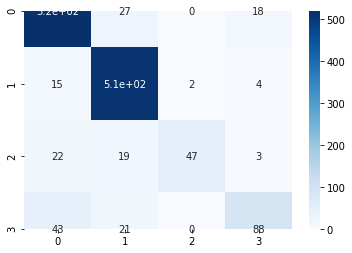

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_cm = confusion_matrix(test['CATEGORY'], test_pred[1])
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.show()

# No56

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_score(y_true, y_pred):
    # 適合率
    precision = precision_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
    precision = np.append(precision, precision_score(y_true, y_pred, average='micro'))
    precision = np.append(precision, precision_score(y_true, y_pred, average='macro'))
    
    # 再現率
    recall = recall_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
    recall = np.append(recall, recall_score(y_true, y_pred, average='micro'))
    recall = np.append(recall, recall_score(y_true, y_pred, average='macro'))
    
    # F1スコア
    f1 = f1_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
    f1 = np.append(f1, f1_score(y_true, y_pred, average='micro'))
    f1 = np.append(f1, f1_score(y_true, y_pred, average='macro'))
    
    scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                         index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
    
    return scores

print(calculate_score(test['CATEGORY'], test_pred[1]))

             適合率       再現率     F1スコア
b       0.866221  0.920071  0.892334
e       0.883681  0.960377  0.920434
t       0.778761  0.578947  0.664151
m       0.959184  0.516484  0.671429
マイクロ平均  0.869760  0.869760  0.869760
マクロ平均   0.871962  0.743970  0.787087


# No57

In [14]:
features = X_train.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(lg.classes_, lg.coef_):
    print(f"[カテゴリ]{c}")
    best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T
    worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
    display(pd.concat([best10, worst10], axis=0))
    print('\n')

[カテゴリ]b


,1,2,3,4,5,6,7,8,9,10
重要度上位,markets,economy,article markets,bank,results,obamacare,fed,china,ecb,business
重要度下位,contactmusic com,contactmusic,www contactmusic,google,microsoft,ebola,fda,apple,tvshowbiz,uk tvshowbiz




[カテゴリ]e


,1,2,3,4,5,6,7,8,9,10
重要度上位,contactmusic com,contactmusic,www contactmusic,entertainment,tvshowbiz,uk tvshowbiz,tvshowbiz article,music,film,television
重要度下位,businessweek,businessweek com,www businessweek,health,uk sciencetech,sciencetech article,sciencetech,com news,reuters,reuters com




[カテゴリ]m


,1,2,3,4,5,6,7,8,9,10
重要度上位,health,ebola,fda,cancer,mers,study,uk health,health article,virus,diabetes
重要度下位,tvshowbiz,uk tvshowbiz,tvshowbiz article,results,www contactmusic,contactmusic com,contactmusic,entertainment,markets,economy




[カテゴリ]t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,apple,microsoft,facebook,climate,space,internet,sciencetech article,uk sciencetech,sciencetech
重要度下位,markets,tvshowbiz,article markets,uk tvshowbiz,tvshowbiz article,entertainment,www contactmusic,contactmusic com,contactmusic,health


# No58

In [25]:
from tqdm import tqdm

result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
    lg = LogisticRegression(random_state=123, max_iter=10000, C=C)
    lg.fit(X_train, train['CATEGORY'])
    
    train_pred = score_lg(lg, X_train)
    valid_pred = score_lg(lg, X_valid)
    test_pred = score_lg(lg, X_test)
    
    train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
    valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])
    test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])
    
    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

  0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
 10%|█         | 1/10 [00:00<00:01,  5.93it/s]/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
 20%|██        | 2/10 

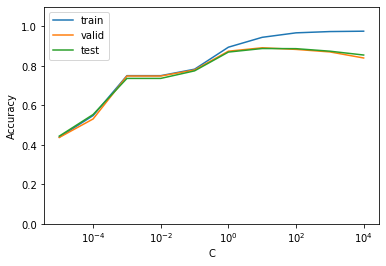

In [26]:
result = np.array(result).T
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')

plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()

# No59

In [27]:
!pip install optuna

     |████████████████████████████████| 200 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 10.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 120 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 8.1 MB/s eta 0:00:01
  Created wheel for optuna: filename=optuna-1.5.0-py3-none-any.whl size=276144 sha256=480c860ab02c95b454feac6cee67b291cb4b38ad55e1f0f61b0c25f79b103ec4
  Stored in directory: /root/.cache/pip/wheels/0a/f9/1b/1c068c5fb648ad0a4600c104495c61ae780a2f3bcf52bcd676
  Created wheel for alembic: filename=alembic-1.4.2-py2.py3-none-any.whl size=159543 sha256=799a289858160f266524cf839ed9ab1fd455489ec429f48d19375df8d221b198
  Stored in directory: /root/.cache/pip/wheels/4e

In [28]:
import optuna

# 最適化対象を関数で指定
def objective_lg(trial):
  # チューニング対象パラメータのセット
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
  C = trial.suggest_loguniform('C', 1e-4, 1e4)

  # モデルの学習
  lg = LogisticRegression(random_state=123, 
                          max_iter=10000, 
                          penalty='elasticnet', 
                          solver='saga', 
                          l1_ratio=l1_ratio, 
                          C=C)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  valid_pred = score_lg(lg, X_valid)

  # 正解率の算出
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])    

  return valid_accuracy 

In [29]:
# 最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective_lg, timeout=3600)

# 結果の表示
print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
  print('    {}: {}'.format(key, value))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[I 2020-06-23 15:58:28,508] Finished trial#0 with value: 0.7485029940119761 with parameters: {'l1_ratio': 0.587989561557871, 'C': 0.025697199685162698}. Best is trial#0 with value: 0.7485029940119761.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[I 2020-06-23 15:58:56,440] Finished trial#1 with value: 0.8660179640718563 with parameters: {'l1_ratio': 0.6183767739435898, 'C': 0.8122956426891249}. Best is trial#1 with value: 0.8660179640718563.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class w

Best trial:
  Value: 0.889
  Params: 
    l1_ratio: 0.6350344078499509
    C: 6.851301106166997


In [30]:
# パラメータの設定
l1_ratio = trial.params['l1_ratio']
C = trial.params['C']

# モデルの学習
lg = LogisticRegression(random_state=123, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio, 
                        C=C)
lg.fit(X_train, train['CATEGORY'])

# 予測値の取得
train_pred = score_lg(lg, X_train)
valid_pred = score_lg(lg, X_valid)
test_pred = score_lg(lg, X_test)

# 正解率の算出
train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1]) 
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1]) 
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1]) 

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


正解率（学習データ）：0.943
正解率（検証データ）：0.889
正解率（評価データ）：0.884


In [31]:
!pip install xgboost

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 127.6 MB 63 kB/s  eta 0:00:01


In [32]:
import xgboost as xgb

params={'objective': 'multi:softmax', 
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'colsample_bytree': 1.0, 
        'colsample_bylevel': 0.5,
        'min_child_weight': 1,
        'subsample': 0.9, 
        'eta': 0.1, 
        'max_depth': 5,
        'gamma': 0.0,
        'alpha': 0.0,
        'lambda': 1.0,
        'num_round': 1000,
        'early_stopping_rounds': 50,
        'verbosity': 0
        }

# XGBoost用にフォーマット変換
category_dict = {'b': 0, 'e': 1, 't':2, 'm':3}
y_train = train['CATEGORY'].map(lambda x: category_dict[x])
y_valid = valid['CATEGORY'].map(lambda x: category_dict[x])
y_test = test['CATEGORY'].map(lambda x: category_dict[x])
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# モデルの学習
num_round = params.pop('num_round')
early_stopping_rounds = params.pop('early_stopping_rounds')
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds)

[0]	train-mlogloss:1.27035	eval-mlogloss:1.27178
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.17701	eval-mlogloss:1.17912
[2]	train-mlogloss:1.09777	eval-mlogloss:1.10141
[3]	train-mlogloss:1.03026	eval-mlogloss:1.03525
[4]	train-mlogloss:0.97241	eval-mlogloss:0.97808
[5]	train-mlogloss:0.92234	eval-mlogloss:0.92936
[6]	train-mlogloss:0.87791	eval-mlogloss:0.88600
[7]	train-mlogloss:0.83937	eval-mlogloss:0.84877
[8]	train-mlogloss:0.80510	eval-mlogloss:0.81534
[9]	train-mlogloss:0.77461	eval-mlogloss:0.78586
[10]	train-mlogloss:0.74725	eval-mlogloss:0.75843
[11]	train-mlogloss:0.72286	eval-mlogloss:0.73440
[12]	train-mlogloss:0.70080	eval-mlogloss:0.71367
[13]	train-mlogloss:0.68135	eval-mlogloss:0.69490
[14]	train-mlogloss:0.66316	eval-mlogloss:0.67774
[15]	train-mlogloss:0.64709	eval-mlogloss:0.66268
[16]	train-mlogloss:0.63287	eval-mlogloss:0.64899
[17]	trai

In [33]:
# 予測値の取得
train_pred = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
valid_pred = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
test_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)

# 正解率の算出
train_accuracy = accuracy_score(y_train, train_pred) 
valid_accuracy = accuracy_score(y_valid, valid_pred) 
test_accuracy = accuracy_score(y_test, test_pred) 

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.948
正解率（検証データ）：0.874
正解率（評価データ）：0.870
